In [1]:
# Load all the dataframes we use and plot all info we have on a few particular patients to get an insight in the data (work together on this maybe)

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/MSOAC Placebo Data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files'
]

In [3]:
# Functional Tests
file_name = 'ft.csv'
file_path = next(f'{path}/{file_name}' for path in possible_paths if os.path.exists(f'{path}/{file_name}'))

# Read the CSV file into a DataFrame
ftests = pd.read_csv(file_path)


# Visual Tests
file_name = 'oe.csv'
file_path = next(f'{path}/{file_name}' for path in possible_paths if os.path.exists(f'{path}/{file_name}'))

# Read the CSV file into a DataFrame
opt = pd.read_csv(file_path)

# Questionnaires
file_name = 'qs.csv'
file_path = next(f'{path}/{file_name}' for path in possible_paths if os.path.exists(f'{path}/{file_name}'))

# Read the CSV file into a DataFrame
qs = pd.read_csv(file_path)

C:\Users\lenne\AppData\Local\Temp\ipykernel_14284\2546211848.py:6: DtypeWarning: Columns (22,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  ftests = pd.read_csv(file_path)
C:\Users\lenne\AppData\Local\Temp\ipykernel_14284\2546211848.py:14: DtypeWarning: Columns (10,12,15,16,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  opt = pd.read_csv(file_path)
C:\Users\lenne\AppData\Local\Temp\ipykernel_14284\2546211848.py:21: DtypeWarning: Columns (4,9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  qs = pd.read_csv(file_path)


#### Patient-specific plots

In [22]:
# Function to generate patient-specific plot based on functional and visual tests as well as EDSS score
def plot_patient_data(patient):
    # Filter data for the patient in ftests
    ftests_filtered = ftests.loc[ftests['USUBJID'] == patient, ['USUBJID', 'FTTEST', 'FTSTRESN', 'FTDY']]
    
    # Group by unique values of FTTEST and FTDY and calculate the mean of FTSTRESN
    mean_ftstresn = ftests_filtered.groupby(['FTTEST', 'FTDY'])['FTSTRESN'].mean().reset_index()

    # Filter data for the patient in opt
    opt_filtered = opt.loc[opt['USUBJID'] == patient, ['USUBJID', 'OETEST', 'OESTRESN', 'OEDY']]
    opt_filtered = opt_filtered.dropna(subset=['OESTRESN'])
    
    # Group by unique values of OETEST and OEDY and calculate the mean of OESTRESN
    mean_oestresn = opt_filtered.groupby(['OETEST', 'OEDY'])['OESTRESN'].mean().reset_index()

    # Filter data for the patient in qs
    qs_filtered = qs.loc[qs['USUBJID'] == patient, ['USUBJID', 'QSTEST', 'QSSTRESN', 'QSDY']]
    qs_filtered = qs_filtered[qs_filtered['QSTEST'].str.contains('EDSS', case=False, na=False)]
    qs_filtered = qs_filtered.sort_values(by='QSDY')

    # Plot for df1
    for fttest_value in mean_ftstresn['FTTEST'].unique():
        df_subset = mean_ftstresn[mean_ftstresn['FTTEST'] == fttest_value]
        plt.plot(df_subset['FTDY'], df_subset['FTSTRESN'], label=f'{fttest_value}')

    # Plot for df2
    for oetest_value in mean_oestresn['OETEST'].unique():
        df_subset = mean_oestresn[mean_oestresn['OETEST'] == oetest_value]
        plt.plot(df_subset['OEDY'], df_subset['OESTRESN'], label=f'{oetest_value}')

    # Plot for df3
    for qstest_value in qs_filtered['QSTEST'].unique():
        df_subset = qs_filtered[qs_filtered['QSTEST'] == qstest_value]
        plt.plot(df_subset['QSDY'], df_subset['QSSTRESN'], label=f'{qstest_value}')

    plt.xlabel('Day of Test Outcome Measurement')
    plt.ylabel('Outcome')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(f'Patient {patient} Data')
    plt.show()

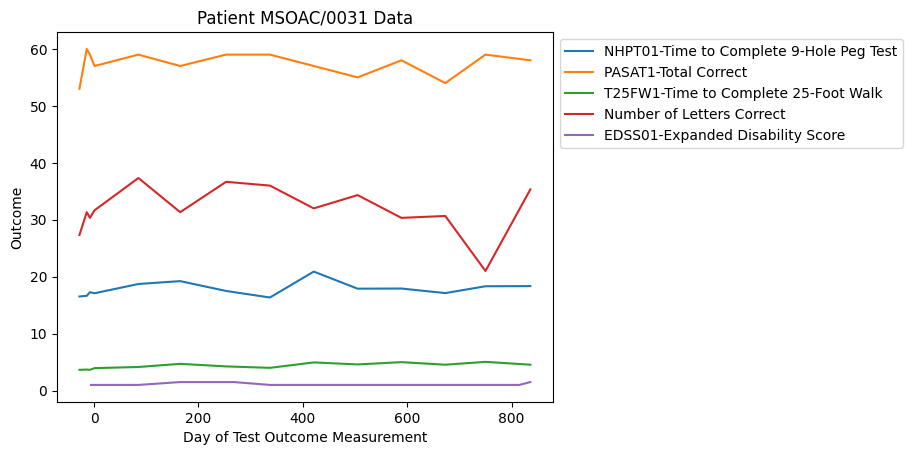

In [23]:
patient = 'MSOAC/0031'
plot_patient_data(patient)

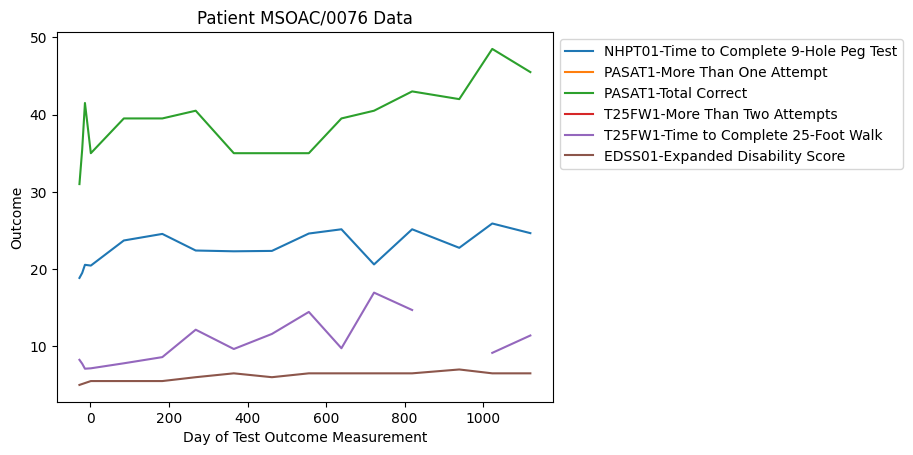

In [24]:
patient = 'MSOAC/0076'
plot_patient_data(patient)

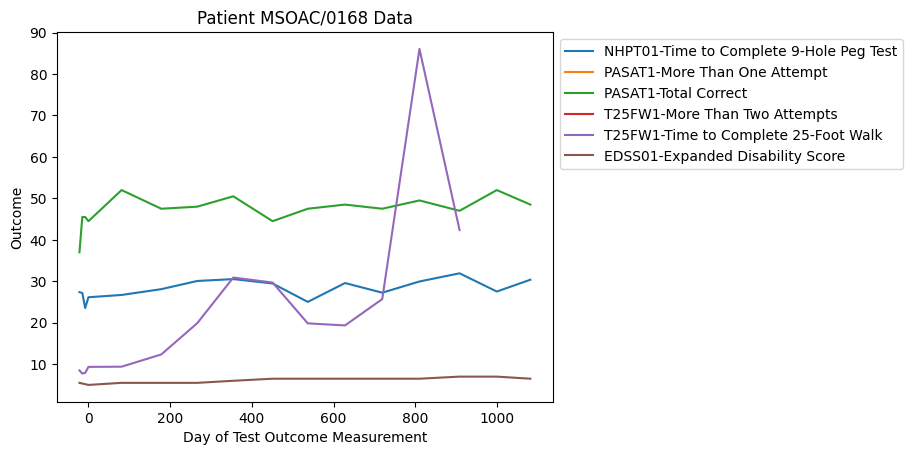

In [25]:
patient = 'MSOAC/0168'
plot_patient_data(patient)

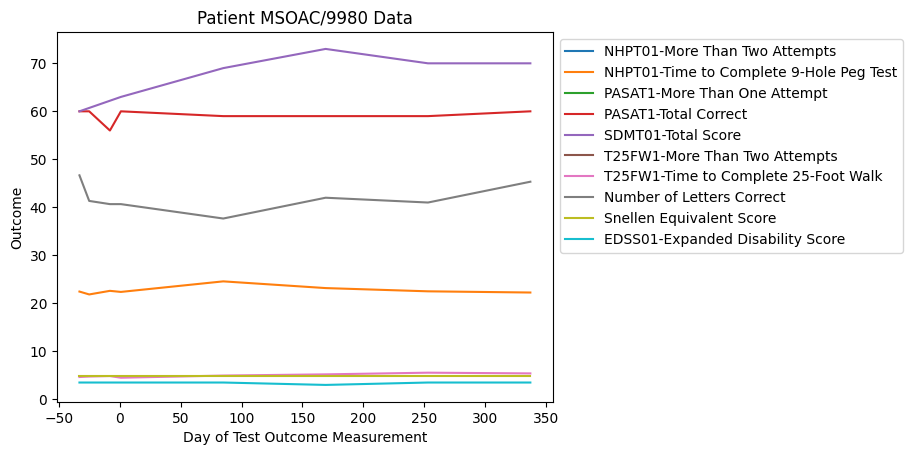

In [26]:
patient = 'MSOAC/9980'
plot_patient_data(patient)

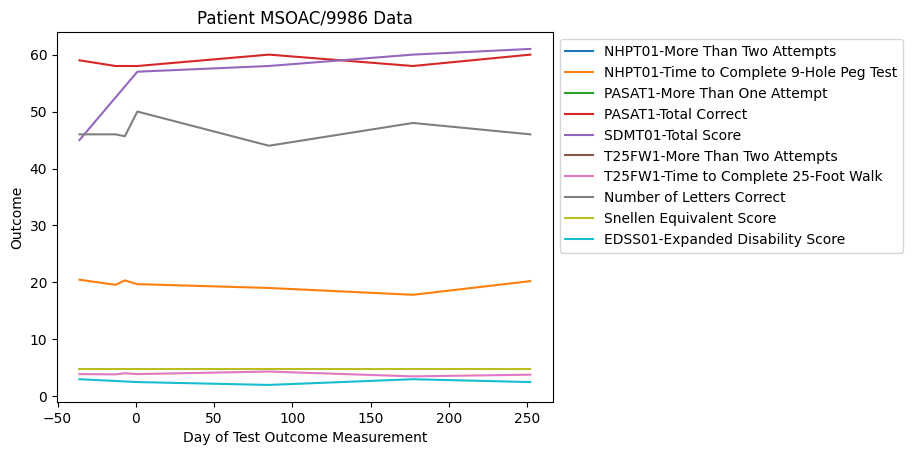

In [27]:
patient = 'MSOAC/9986'
plot_patient_data(patient)